In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
# 아이리스 불러오고, 트레인 테스트 분리하기
iris = datasets.load_iris()
X = iris.data[:, :3]
y = iris.data[:, 3]

In [5]:
# 트레인 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# 선형 회귀
model = LinearRegression() 
model.fit(X_train, y_train)

# 모델을 이용하여 예측하기
pred = model.predict(X_test)

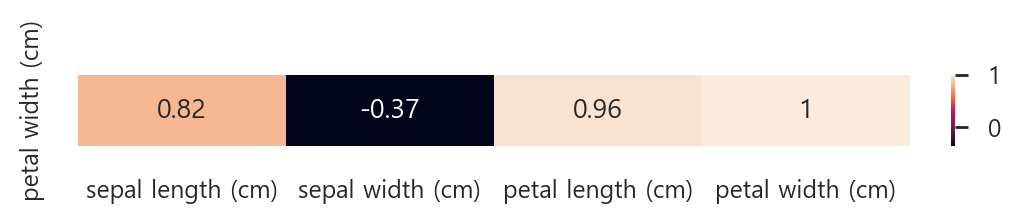

In [51]:
fig, ax = plt.subplots(figsize=(5,1))

sns.heatmap(pd.DataFrame(iris.data, columns = iris.feature_names).corr()[-1:],
            annot=True);

In [7]:
# 회귀 계수(Coefficients)
print('회귀 계수:', model.coef_)
# 평균 제곱 오차
print('평균 제곱 오차: %.2f' % mean_squared_error(y_test, pred))
# 결정 계수 (R^2 score) : coefficients of determination
print('결정 계수: %.2f' % r2_score(y_test, pred))

회귀 계수: [-0.19918374  0.20693216  0.52260085]
평균 제곱 오차: 0.05
결정 계수: 0.89


회귀 계수 (Slope): -0.19918373646787643
절편 (Intercept): -0.22295759539281335


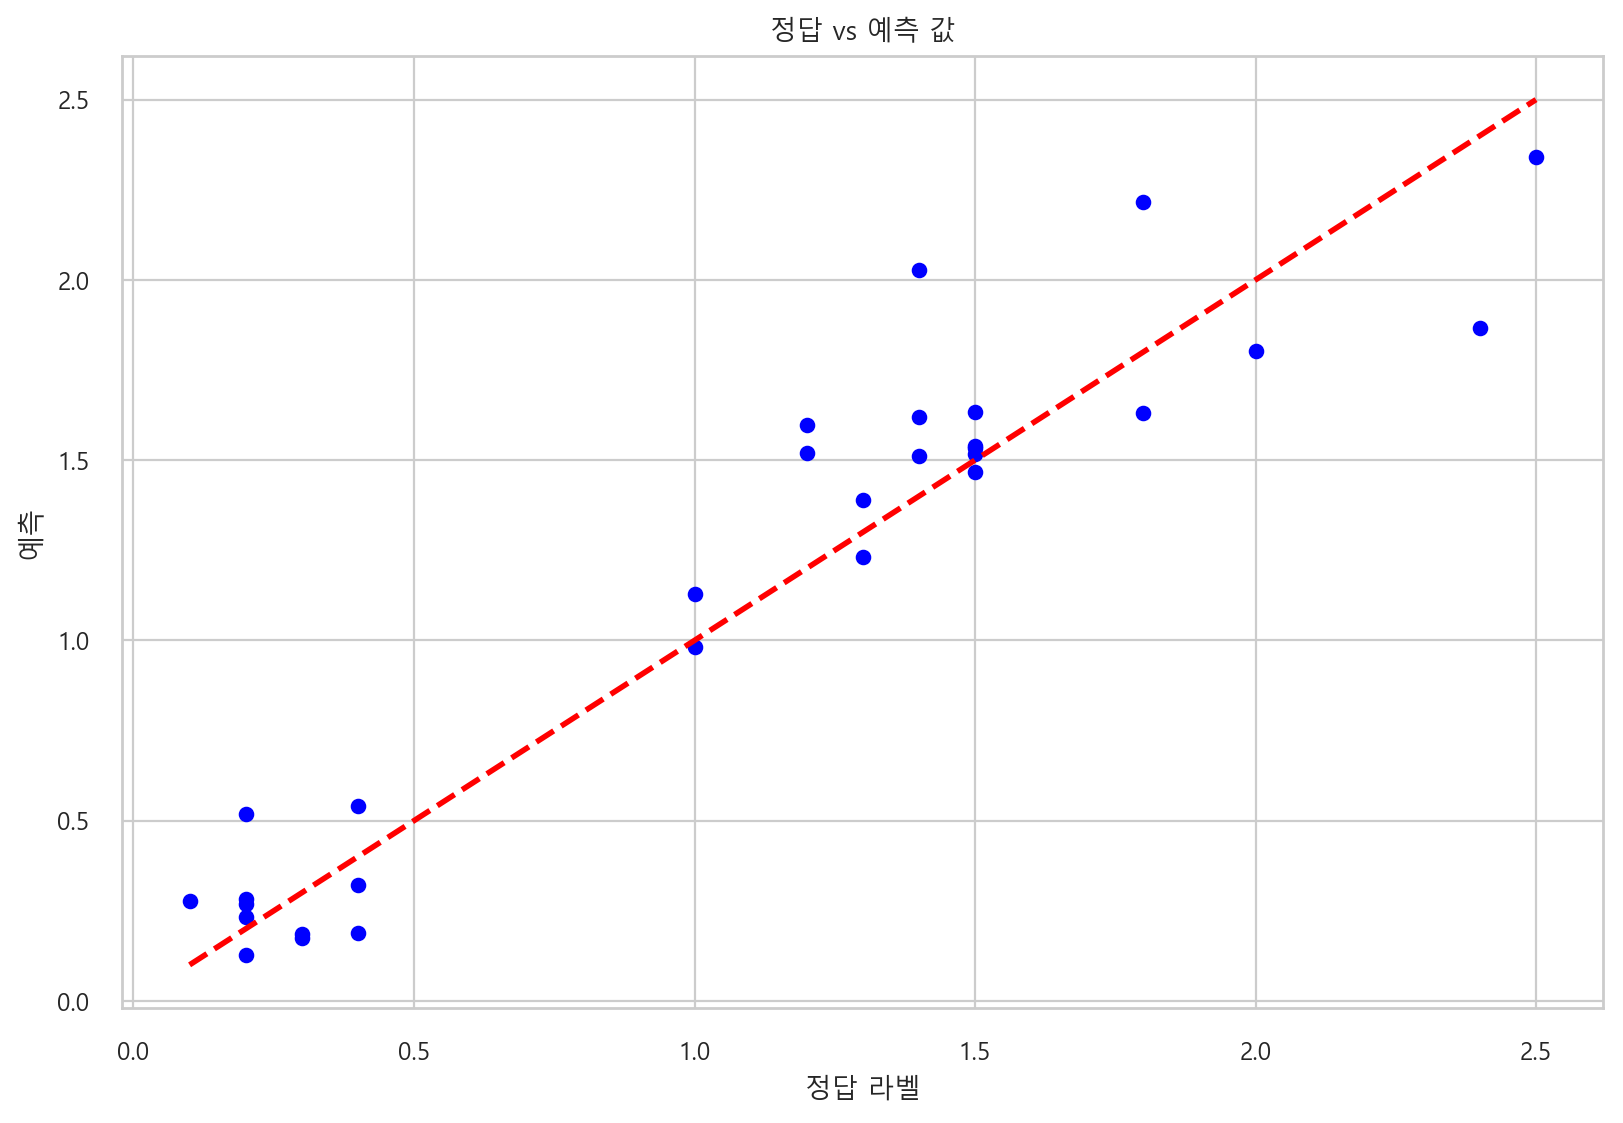

In [8]:
# 회귀 계수와 절편
print('회귀 계수 (Slope):', model.coef_[0])
print('절편 (Intercept):', model.intercept_)

# 결과 그리기
# 다차원 이기 때문에, 정답 라벨과 예측 값에 대한 그래프.
plt.scatter(y_test, pred, color='blue')
plt.xlabel('정답 라벨')
plt.ylabel('예측')

plt.title('정답 vs 예측 값')
# 대각선 그리기
plt.plot([min(y_test), max(y_test)],
          [min(y_test), max(y_test)],
           color='red', linestyle='--', linewidth=2)
plt.show()